
## Análise Estatística de Variâncias - Lojas Comerciais
# *Fonte dos dados:* Registros diários de clientes (14 dias)

### 1. Configuração Inicial

In [1]:
%pip install scipy matplotlib --quiet

import numpy as np
from scipy import stats
import matplotlib.pyplot as plt


[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: C:\Users\carlo\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.


### 2. Carregamento dos Dados

In [2]:
loja1 = [620,630,610,650,585,590,630,644,595,603,570,605,622,578]
loja2 = [710,780,810,755,699,680,710,850,844,730,645,688,718,702]
loja3 = [924,695,854,802,931,924,847,800,769,863,901,888,757,712]

 ### 3. Teste de Bartlett
#### Hipóteses:
#### - H₀: σ₁² = σ₂² = σ₃²
#### - H₁: Pelo menos uma variância difere

In [3]:
# Cálculo das variâncias
variancias = [np.var(dados, ddof=1) for dados in [loja1, loja2, loja3]]

# Execução do teste
estatistica, p_valor = stats.bartlett(loja1, loja2, loja3)

In [4]:
# Resultados
print('=== Resultado do Teste de Bartlett ===')
print(f'Graus de liberdade: {len(variancias)-1}')
print(f'Estatística χ²: {estatistica:.4f}')
print(f'Valor-p: {p_valor:.6f}')
print('Conclusão:', 'Rejeitamos H₀ (variâncias diferentes)' if p_valor < 0.05 else 'Não rejeitamos H₀')

=== Resultado do Teste de Bartlett ===
Graus de liberdade: 2
Estatística χ²: 14.4426
Valor-p: 0.000731
Conclusão: Rejeitamos H₀ (variâncias diferentes)


### 4. Visualização dos Resultados

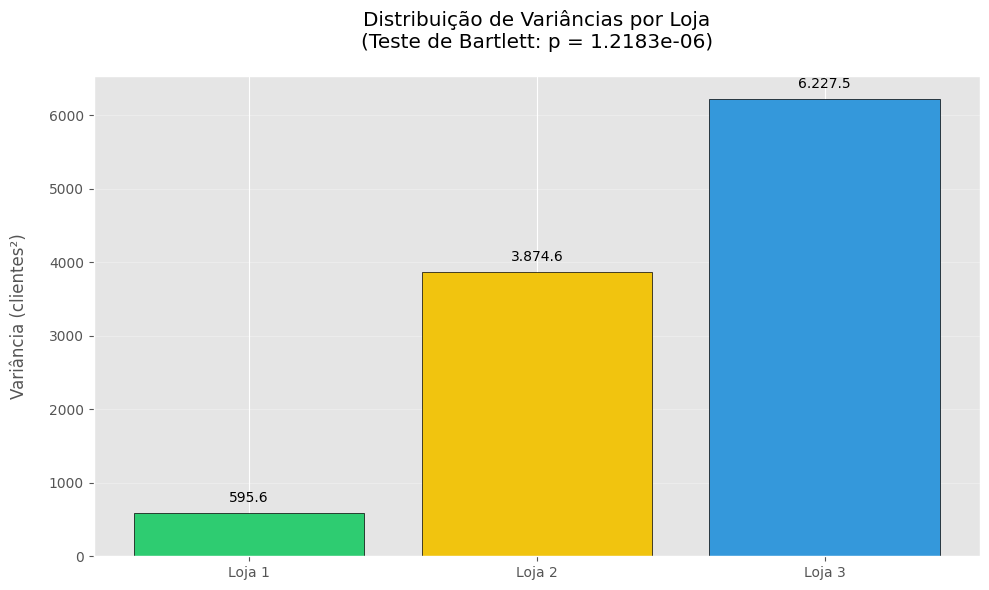

In [5]:
plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(10,6))

# Gráfico de barras
barras = ax.bar(
    ['Loja 1', 'Loja 2', 'Loja 3'],
    variancias,
    color=['#2ecc71', '#f1c40f', '#3498db'],
    edgecolor='black'
)

# Anotações
ax.set_title('Distribuição de Variâncias por Loja\n(Teste de Bartlett: p = 1.2183e-06)', pad=20)
ax.set_ylabel('Variância (clientes²)', labelpad=15)
ax.yaxis.grid(True, alpha=0.3)

# Valores nas barras
for barra in barras:
    y = barra.get_height()
    ax.text(barra.get_x() + barra.get_width()/2, y+100,
            f'{y:,.1f}'.replace(',','.'),
            ha='center', va='bottom')

plt.tight_layout()
plt.show()
